In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [38]:
# Tema ayarları / Theme settings
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

In [39]:
# CSV dosyasını oku / Read the CSV file
df = pd.read_csv("ai_job_market_insights.csv")

In [40]:
# Veri yapısını gözlemle / Observe the data structure
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Job_Title              500 non-null    object 
 1   Industry               500 non-null    object 
 2   Company_Size           500 non-null    object 
 3   Location               500 non-null    object 
 4   AI_Adoption_Level      500 non-null    object 
 5   Automation_Risk        500 non-null    object 
 6   Required_Skills        500 non-null    object 
 7   Salary_USD             500 non-null    float64
 8   Remote_Friendly        500 non-null    object 
 9   Job_Growth_Projection  500 non-null    object 
dtypes: float64(1), object(9)
memory usage: 39.2+ KB
None
               Job_Title       Industry Company_Size   Location  \
0  Cybersecurity Analyst  Entertainment        Small      Dubai   
1   Marketing Specialist     Technology        Large  Singapore   
2          A

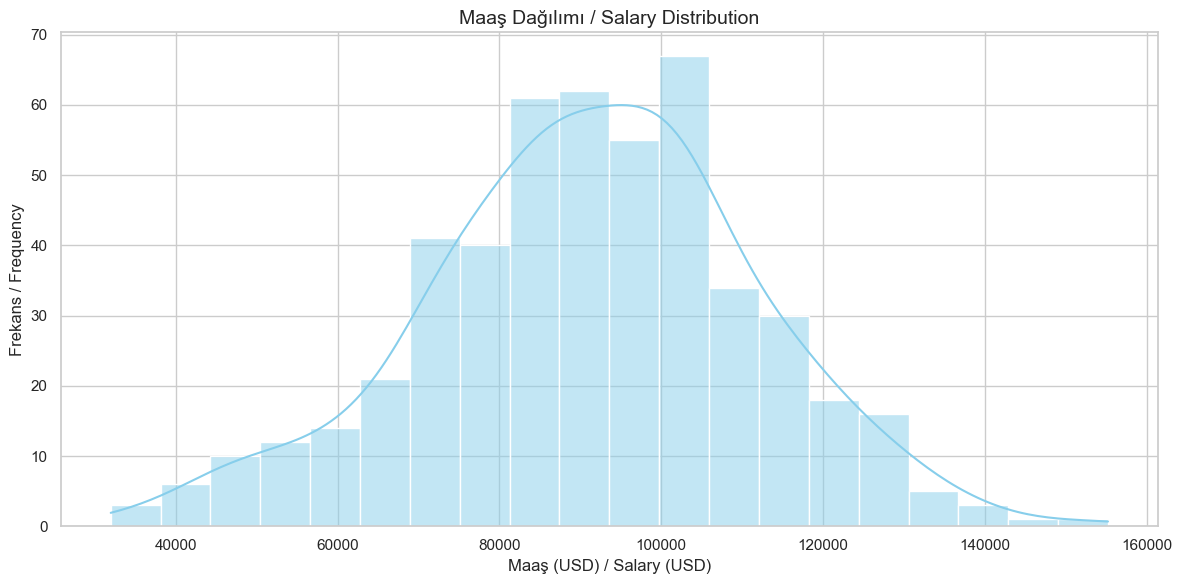

In [41]:
# Maaşların dağılımı histogram + KDE / Histogram of salary with KDE
plt.figure()
sns.histplot(df['Salary_USD'], kde=True, color="skyblue")
plt.title("Maaş Dağılımı / Salary Distribution", fontsize=14)
plt.xlabel("Maaş (USD) / Salary (USD)")
plt.ylabel("Frekans / Frequency")
plt.tight_layout()
plt.show()


C:\Users\aziz-\AppData\Local\Temp\ipykernel_26124\2113792457.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Company_Size", y="Salary_USD", estimator=np.mean, palette="viridis")


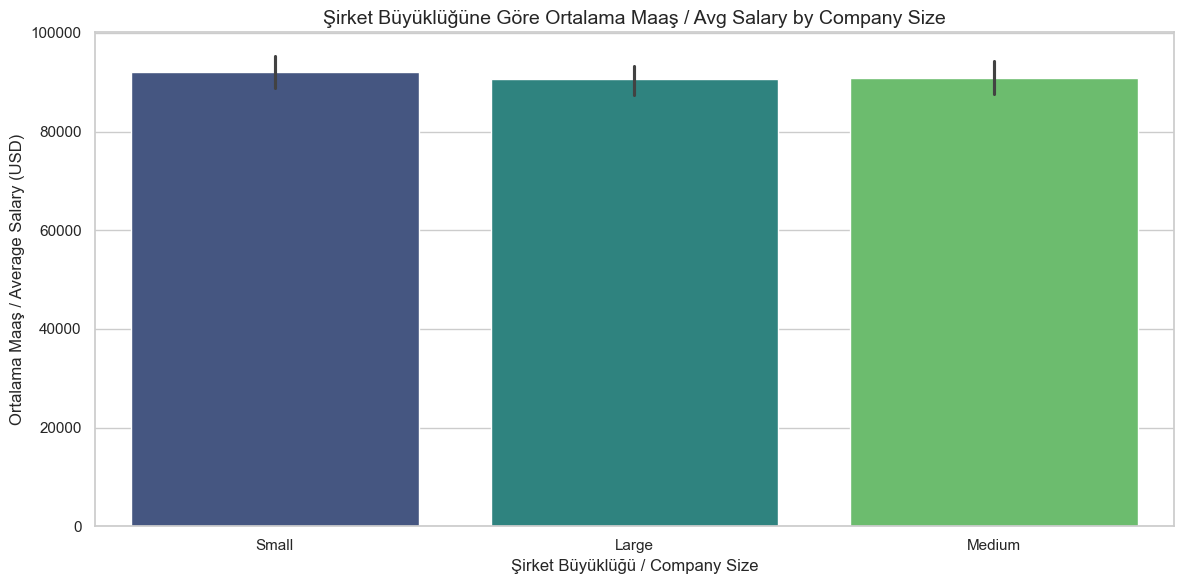

In [42]:
# Ortalama maaşlara göre bar grafiği / Barplot of mean salaries
plt.figure()
sns.barplot(data=df, x="Company_Size", y="Salary_USD", estimator=np.mean, palette="viridis")
plt.title("Şirket Büyüklüğüne Göre Ortalama Maaş / Avg Salary by Company Size", fontsize=14)
plt.xlabel("Şirket Büyüklüğü / Company Size")
plt.ylabel("Ortalama Maaş / Average Salary (USD)")
plt.tight_layout()
plt.show()

C:\Users\aziz-\AppData\Local\Temp\ipykernel_26124\3347623434.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Industry", y="Salary_USD", palette="Set2")


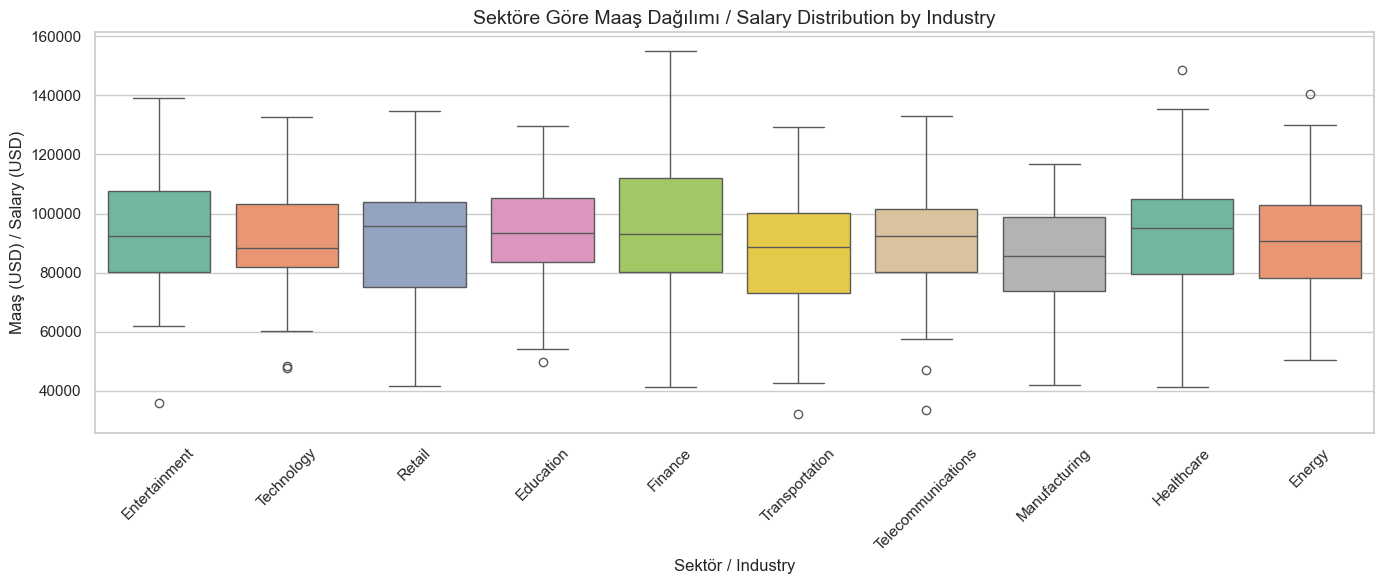

In [43]:
# Sektör bazlı maaş kutu grafiği / Boxplot for salary by industry
plt.figure(figsize=(14,6))
sns.boxplot(data=df, x="Industry", y="Salary_USD", palette="Set2")
plt.title("Sektöre Göre Maaş Dağılımı / Salary Distribution by Industry", fontsize=14)
plt.xlabel("Sektör / Industry")
plt.ylabel("Maaş (USD) / Salary (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\aziz-\AppData\Local\Temp\ipykernel_26124\709647350.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="AI_Adoption_Level", y="Salary_USD", palette="pastel")


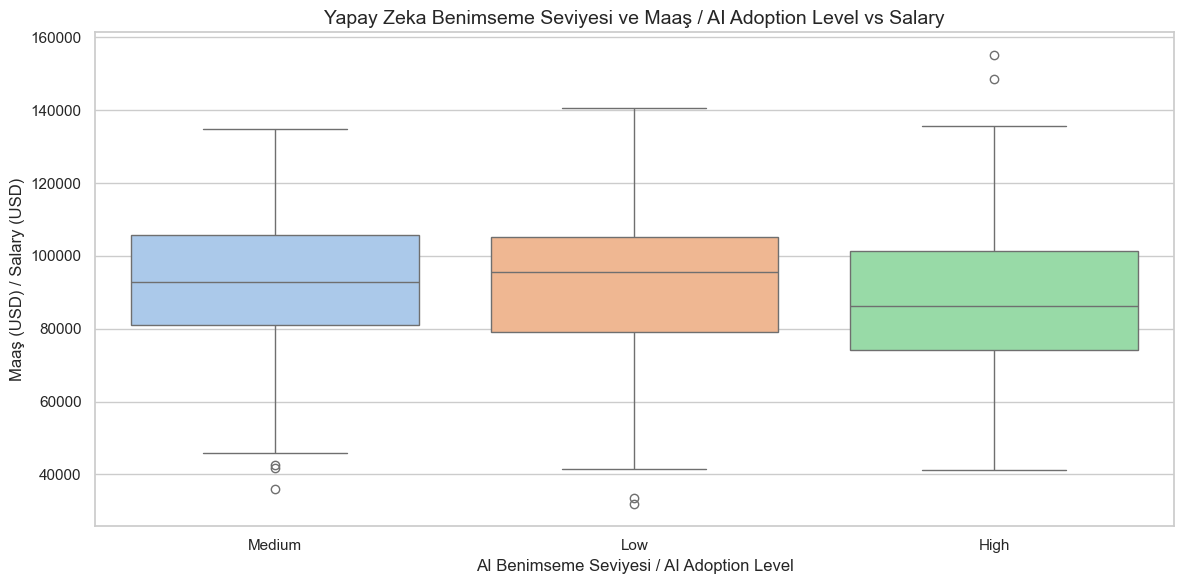

In [44]:
# AI benimseme seviyesine göre maaşlar / Salary distribution by AI adoption level
plt.figure()
sns.boxplot(data=df, x="AI_Adoption_Level", y="Salary_USD", palette="pastel")
plt.title("Yapay Zeka Benimseme Seviyesi ve Maaş / AI Adoption Level vs Salary", fontsize=14)
plt.xlabel("AI Benimseme Seviyesi / AI Adoption Level")
plt.ylabel("Maaş (USD) / Salary (USD)")
plt.tight_layout()
plt.show()

C:\Users\aziz-\AppData\Local\Temp\ipykernel_26124\237361582.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Remote_Friendly', palette="Set1")


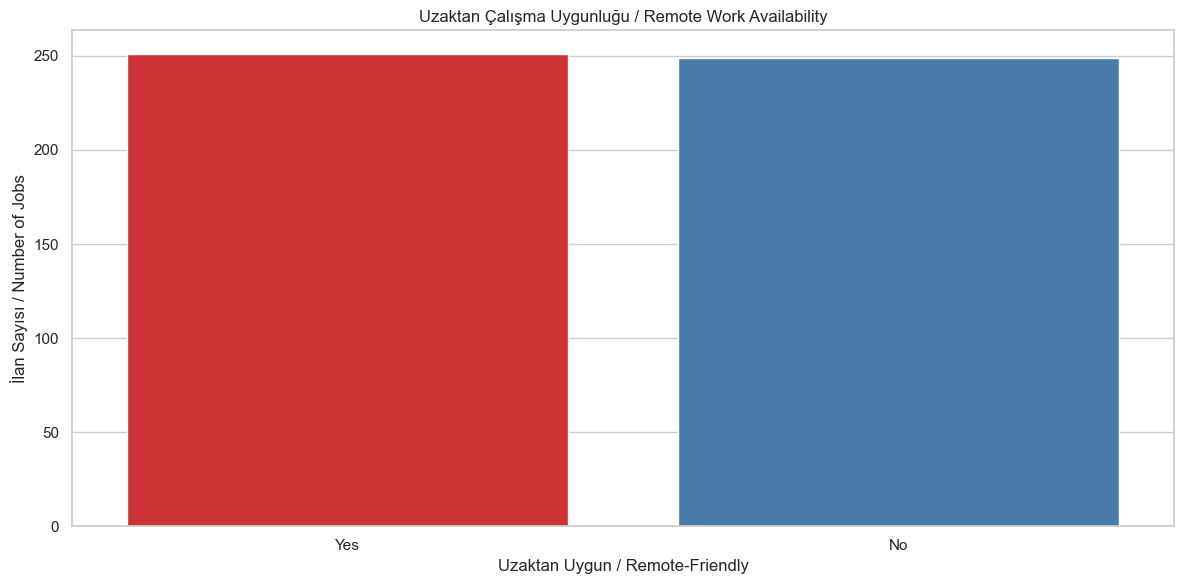

In [45]:
#Uzaktan Çalışma Uygunluğu / Remote Work Availability
remote_counts = df['Remote_Friendly'].value_counts()

plt.figure()
sns.countplot(data=df, x='Remote_Friendly', palette="Set1")
plt.title("Uzaktan Çalışma Uygunluğu / Remote Work Availability")
plt.xlabel("Uzaktan Uygun / Remote-Friendly")
plt.ylabel("İlan Sayısı / Number of Jobs")
plt.tight_layout()
plt.show()

C:\Users\aziz-\AppData\Local\Temp\ipykernel_26124\3616679499.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.values, y=top_locations.index, palette="magma")


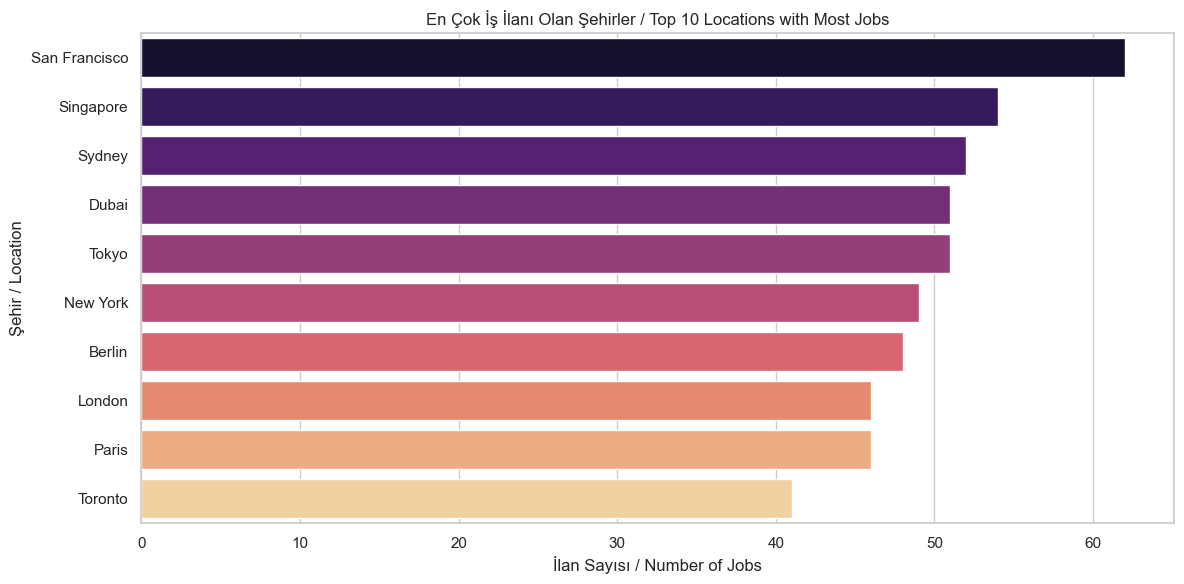

In [46]:
#En Çok İş İlanı Olan Şehirler / Top 10 Locations with Most Jobs
top_locations = df['Location'].value_counts().head(10)

plt.figure()
sns.barplot(x=top_locations.values, y=top_locations.index, palette="magma")
plt.title("En Çok İş İlanı Olan Şehirler / Top 10 Locations with Most Jobs")
plt.xlabel("İlan Sayısı / Number of Jobs")
plt.ylabel("Şehir / Location")
plt.tight_layout()
plt.show()

C:\Users\aziz-\AppData\Local\Temp\ipykernel_26124\1455643330.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=growth_salary.index, y=growth_salary.values, palette="BuGn_r")


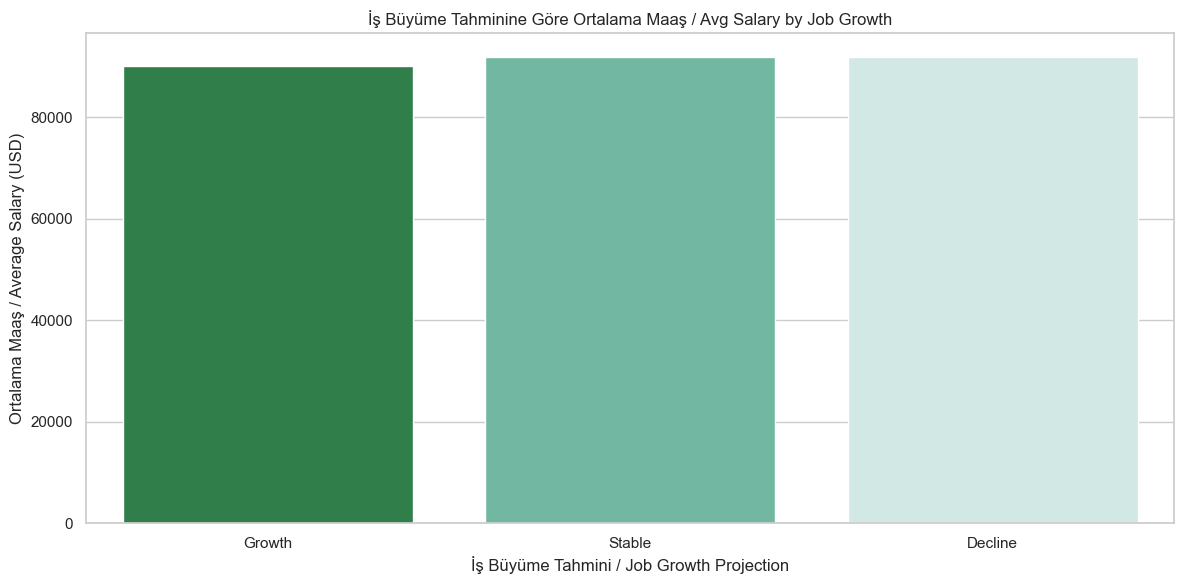

In [47]:
#İş Büyüme Tahminine Göre Ortalama Maaş / Avg Salary by Job Growth
growth_salary = df.groupby("Job_Growth_Projection")['Salary_USD'].mean().sort_values()

plt.figure()
sns.barplot(x=growth_salary.index, y=growth_salary.values, palette="BuGn_r")
plt.title("İş Büyüme Tahminine Göre Ortalama Maaş / Avg Salary by Job Growth")
plt.xlabel("İş Büyüme Tahmini / Job Growth Projection")
plt.ylabel("Ortalama Maaş / Average Salary (USD)")
plt.tight_layout()
plt.show()

In [48]:
# Hedef değişken / Target variable
y = df["Salary_USD"]

In [49]:
# Giriş değişkenleri / Feature variables
X = df.drop(columns=["Salary_USD", "Required_Skills", "Job_Title"])  # Metinsel sütunları çıkarıyoruz / Drop text-heavy columns

In [50]:
# Kategorik sütunları tespit et / Detect categorical columns
categorical_cols = X.select_dtypes(include="object").columns.tolist()

In [51]:
# Dönüştürme işlemi / Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ]
)

In [67]:
# Model pipeline oluştur / Create model pipeline
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(random_state=42))
])

In [69]:

#  Eğitim ve test verisine ayır / Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
# Modeli eğit / Fit the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Industry', 'Company_Size',
                                                   'Location',
                                                   'AI_Adoption_Level',
                                                   'Automation_Risk',
                                                   'Remote_Friendly',
                                                   'Job_Growth_Projection'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [73]:
# Tahmin yap / Predict
y_pred = model.predict(X_test)

In [75]:
# Performans ölçümleri / Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R2 Score:", r2)

MAE: 19040.495898824847
RMSE: 24350.96537963969
R2 Score: -0.14640807373094544
